# <b>Regresi</b>
<a name="regresi"></a>

Beberapa jenis regresi yang akan kita bahas nantinya adalah:
- [Regresi](#regresi)
    - [Simple Linear Regression](#simple-linear-regression)
    - [Multiple Regression](#multiple-regression)
    - [Non-Linear Regression](#non-linear-regression)
- [Evaluation Metrics (Regresi)](#evaluation-metrics-regresi)

### <b>Simple Linear Regression</b>
<a name="simple-linear-regression"></a>

<p>Simple Regression adalah metode statistik yang memperkirakan hubungan antara satu variabel dependen dan satu variabel independen. Ini adalah jenis model regresi yang digunakan untuk menggambarkan hubungan antara dua variabel kuantitatif. Simple Regression juga dikenal sebagai simple linear regression, karena melibatkan pencocokan garis lurus dengan data yang diamati.</p>

<ul>
    <li><b>Variabel Dependen</b></li>
        <p>Variabel dependen adalah input dalam model supervised learning. Variabel-variabel ini adalah variabel yang        dimanipulasi untuk mengamati efeknya terhadap variabel dependen.

Contoh: Bayangkan Anda sedang membuat kue. Jumlah gula yang Anda masukkan adalah variabel independen - itulah yang dapat Anda ubah untuk membuat kue lebih manis atau kurang manis.</p>
    <li><b>Variabel Independen</b></li>
        <p>Variabel independen adalah output dari model. Variabel ini adalah variabel yang ingin kita prediksi atau pahami.

Contoh: Rasa manis dari kue adalah variabel dependen. Tergantung pada jumlah gula yang ditambahkan.
    </p>
</ul>

<h4><b>Rumus</b></h4>

![simple_reg.png](../images/simple_reg.png)

>- y = nilai prediksi variabel dependen (y) untuk setiap nilai variabel independen (x) yang diberikan.  
>- $\beta_{0}$ = intercept, nilai prediksi y ketika x = 0.  
>- $\beta_{1}$ = koefisien regresi, seberapa besar kita mengharapkan y berubah ketika x meningkat.  
>- x = variabel independen (variabel yang kita harapkan mempengaruhi y).  
>- $\epsilon$ = kesalahan estimasi, atau seberapa besar variasi yang ada dalam estimasi kita terhadap koefisien regresi.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
income_data = pd.read_csv("../dataset/income.data.csv")

In [3]:
income_data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X1 = income_data["income"]  # Independent variable
y1 = income_data["happiness"]  # Dependent variable

In [5]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=1
)

In [6]:
reg = LinearRegression()

X1_train = X1_train.to_numpy().reshape(-1, 1)
y1_train = y1_train.to_numpy().reshape(-1, 1)

X1_test = X1_test.to_numpy().reshape(-1, 1)
y1_test = y1_test.to_numpy().reshape(-1, 1)

reg.fit(X1_train, y1_train)

LinearRegression()

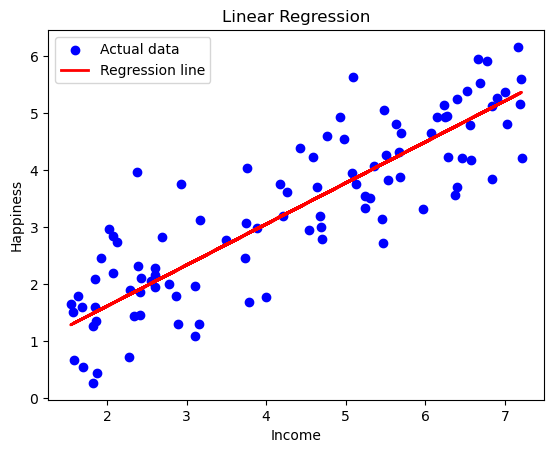

In [7]:
plt.scatter(X1_test, y1_test, color="blue", label="Actual data")

# Plotting the regression line
plt.plot(
    X1_test, reg.predict(X1_test), color="red", linewidth=2, label="Regression line"
)

plt.title("Linear Regression")
plt.xlabel("Income")
plt.ylabel("Happiness")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y1_pred = reg.predict(X1_test)

mae = mean_absolute_error(y1_test, y1_pred)

mse = mean_squared_error(y1_test, y1_pred)

rsquared = r2_score(y1_test, y1_pred)

rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", rsquared)
print("RMSE:", rmse)

MAE: 0.5928474195973894
MSE: 0.5514895183944514
R-squared: 0.7401256340340991
RMSE: 0.7426234028055212



### <b>Multiple Regression (Supervised Learning)</b>
<a name="multiple-regression"></a>
<p>Multiple regression adalah teknik statistik yang memperkirakan hubungan antara variabel dependen dan dua atau lebih variabel independen. Metode ini merupakan lanjutan dari Simple Regression, yang hanya melibatkan satu variabel independen. Multiple regression juga dikenal sebagai multiple linear regression (MLR).</p>

<h4><b>Rumus</b></h4>

![multiple_reg.png](../images/multiple_reg.png)

>$y$ = nilai prediksi dari variabel dependen
>
>$\beta_{0}$ = intersep y (nilai y ketika semua parameter lain ditetapkan ke 0)
>
>$\beta_{1}X_{1}$ = koefisien regresi (B1) dari variabel independen pertama (X1) (alias efek peningkatan nilai variabel independen terhadap nilai y yang diprediksi)
>
>$\beta_{n}X_{n}$ = koefisien regresi dari variabel independen terakhir
>
>$\epsilon$ = kesalahan model (alias berapa banyak variasi yang ada dalam perkiraan kita tentang y)

<p>Analisis ini memungkinkan kita untuk menilai seberapa baik kombinasi variabel bebas dapat memprediksi nilai variabel terikat dan seberapa signifikan masing-masing variabel bebas dalam membuat prediksi tersebut. Hal ini dilakukan dengan menghitung koefisien regresi yang meminimalkan kesalahan model, menggunakan statistik t untuk menilai keandalan model secara keseluruhan, dan nilai p untuk mengukur probabilitas bahwa hubungan yang diamati terjadi secara kebetulan.

Sebagai contoh praktis, dalam kasus restoran, multiple regression dapat digunakan untuk menentukan bagaimana faktor-faktor seperti kualitas makanan, layanan, dan dekorasi mempengaruhi harga makanan. Dengan demikian, kita dapat memahami variabel mana yang paling mempengaruhi pembentukan harga dan seberapa kuat pengaruhnya.</p>

In [9]:
import statsmodels.api as sm

heart_data = pd.read_csv("../dataset/heart.data.csv")

In [10]:
# Menentukan Variabel
X2 = heart_data[["biking", "smoking"]]  # Independent variables
y2 = heart_data["heart.disease"]  # Dependent variable

# Menentukan starting point y bila x=0
X2 = sm.add_constant(X2)

# Fit the multiple linear model
model = sm.OLS(y2, X2).fit()

In [11]:
# View the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          heart.disease   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.190e+04
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:17:49   Log-Likelihood:                -493.68
No. Observations:                 498   AIC:                             993.4
Df Residuals:                     495   BIC:                             1006.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9847      0.080    186.988      0.0

In [12]:
# Hitung min max mean
min_smoking = heart_data["smoking"].min()
mean_smoking = heart_data["smoking"].mean()
max_smoking = heart_data["smoking"].max()

# Cetak value
print(f"Minimum smoking rate: {min_smoking}")
print(f"Mean smoking rate: {mean_smoking}")
print(f"Maximum smoking rate: {max_smoking}")

Minimum smoking rate: 0.525849992525764
Mean smoking rate: 15.435034414451994
Maximum smoking rate: 29.946743110544


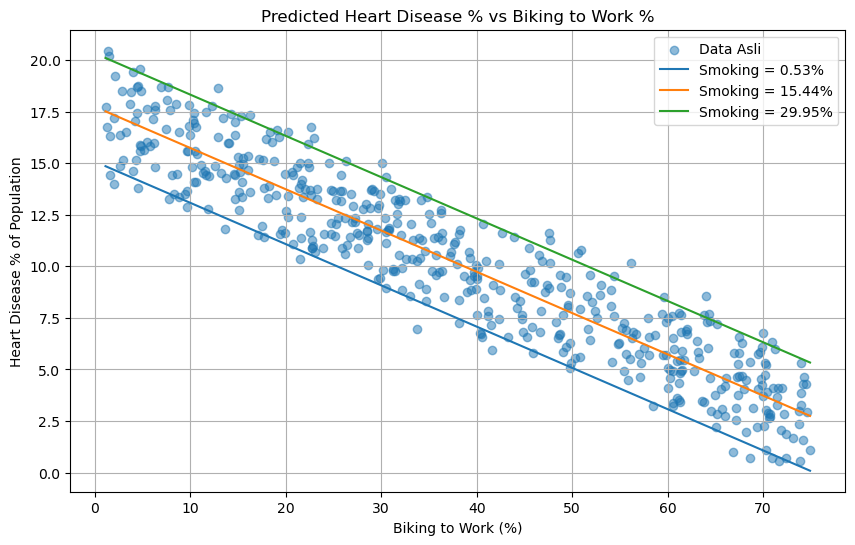

In [13]:
# Tentukan rentang value bersepeda untuk sumbu x
biking_percentages = np.linspace(
    heart_data["biking"].min(), heart_data["biking"].max(), 100
)

# Buat gambar dan sumbu
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot untuk data asli
ax.scatter(
    heart_data["biking"], heart_data["heart.disease"], alpha=0.5, label="Data Asli"
)

# Gambarkan garis untuk setiap value merokok
for smoking_percentage in [0.53, 15.44, 29.95]:
    # Buat DataFrame dengan value bersepeda dan value merokok yang konstan
    input_data = pd.DataFrame(
        {"const": 1, "biking": biking_percentages, "smoking": smoking_percentage}
    )
    # Pastikan kolom-kolom dalam urutan yang benar
    input_data = input_data[["const", "biking", "smoking"]]
    # Dapatkan value penyakit jantung yang diprediksi
    predicted_heart_disease = model.predict(input_data)
    ax.plot(
        biking_percentages,
        predicted_heart_disease,
        label=f"Smoking = {smoking_percentage}%",
    )

# Beri label pada sumbu dan tambahkan legenda
ax.set_xlabel("Biking to Work (%)")
ax.set_ylabel("Heart Disease % of Population")
ax.legend()
ax.grid(True)
ax.set_title("Predicted Heart Disease % vs Biking to Work %")

# Tampilkan plot
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Get the predicted values
predicted_values = model.predict(X2)

# Evaluation Metrics
r_squared = model.rsquared
print(f"R-squared: {r_squared:.2f}")

mae = mean_absolute_error(y2, predicted_values)
print(f"Mean Absolute Error: {mae:.2f}")

mse = mean_squared_error(y2, predicted_values)
print(f"Mean Squared Error: {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 0.98
Mean Absolute Error: 0.52
Mean Squared Error: 0.43
Root Mean Squared Error: 0.65


### <b>Non-Linear Regression</b>
<a name="non-linear-regression"></a>
<p>Nonlinear regression adalah metode statistik yang digunakan untuk memodelkan hubungan antara variabel dependen dengan satu atau lebih variabel independen ketika hubungan tersebut tidak linier. Dengan kata lain, metode ini digunakan untuk menyesuaikan kurva dengan data ketika hubungan antara variabel tidak berbentuk garis lurus.

Model regresi nonlinier dapat memiliki banyak bentuk, termasuk di antaranya adalah fungsi polinomial, eksponensial, dan logaritmik. Pilihan model tergantung pada sifat data dan pertanyaan penelitian yang diajukan. Model nonlinear regression diperkirakan menggunakan algoritma berulang yang meminimalkan perbedaan antara data yang diamati dan nilai prediksi dari model.</p>

In [15]:
gdp_data = pd.read_csv("../dataset/china_gdp.csv")

gdp_data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


**Plotting Data**

<p>Seperti inilah tampilan data poin. Terlihat seperti fungsi logistik atau eksponensial. Pertumbuhannya dimulai dengan lambat, kemudian dari tahun 2005 dan seterusnya, pertumbuhannya sangat signifikan. Dan akhirnya, pertumbuhannya sedikit melambat di tahun 2010-an.</p>

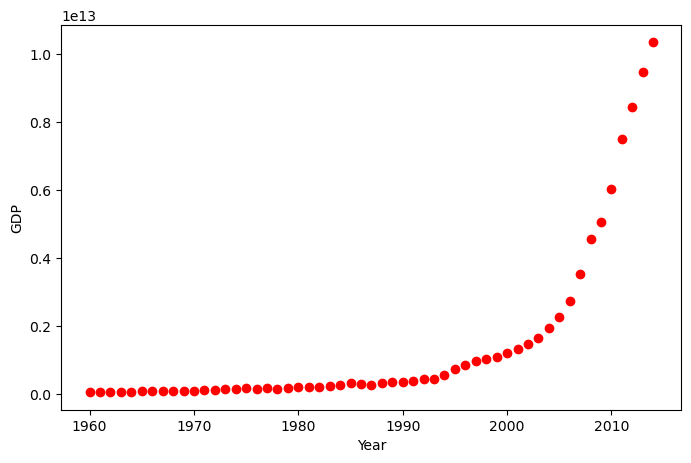

In [16]:
plt.figure(figsize=(8, 5))
x3_data, y3_data = (gdp_data["Year"].values, gdp_data["Value"].values)
plt.plot(x3_data, y3_data, "ro")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

**Memilih model**

Dari pengamatan awal pada plot, kita menentukan bahwa fungsi logistik dapat menjadi perkiraan yang baik, karena fungsi ini memiliki sifat dimulai dengan pertumbuhan yang lambat, pertumbuhan yang meningkat di tengah, dan kemudian menurun lagi di bagian akhir; seperti yang diilustrasikan di bawah ini:

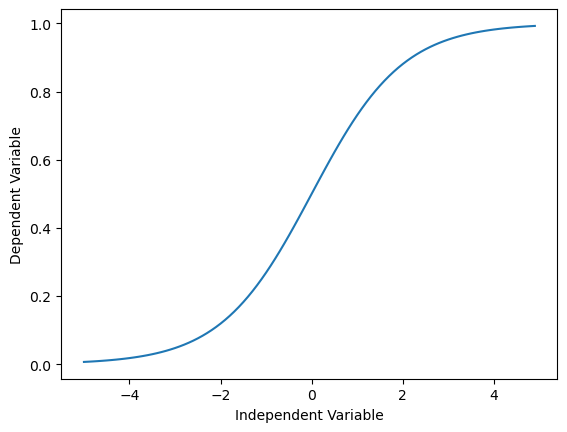

In [17]:
X3 = np.arange(-5, 5.0, 0.1)
Y3 = 1.0 / (1.0 + np.exp(-X3))

plt.plot(X3, Y3)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

`X = np.arange(-5,5.0, 0.1)`: Langkah ini membuat array `X` menggunakan fungsi `arange` dari NumPy, yang menghasilkan nilai dari -5 sampai di bawah 5 (karena nilai berhenti bersifat eksklusif) dengan step 0,1. Array ini akan berfungsi sebagai "variabel independen" untuk plot fungsi sigmoid.

`Y = 1.0 / (1.0 + np.exp(-X))`: Di sini kita menghitung fungsi sigmoid. `np.exp(-X)` menghitung eksponensial dari `-X` untuk setiap elemen dalam array `X`. Hasilnya kemudian digunakan dalam rumus fungsi sigmoid untuk mendapatkan nilai `Y` yang sesuai, yang berfungsi sebagai "variabel dependen".

**Pembuatan Model**

In [18]:
def sigmoid(x3, Beta_1, Beta_2):
    y3 = 1 / (1 + np.exp(-Beta_1 * (x3 - Beta_2)))
    return y3

Fungsi sigmoid yang didefinisikan di sini mewakili kurva sigmoid parametrik, yang merupakan jenis fungsi logistik. Fungsi ini sering digunakan dalam regresi logistik dan neural network karena fungsi ini dapat memetakan nilai input apa pun ke rentang antara 0 dan 1, sehingga sangat berguna untuk memodelkan distribusi probabilitas dan klasifikasi biner.


`y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2))))`

Di dalam fungsi tersebut, variabel y dihitung sebagai nilai fungsi

*   sigmoid pada x dengan parameter yang diberikan Beta_1 dan Beta_2.
np.exp adalah fungsi eksponensial e^x, yang merupakan fungsi matematika dasar yang sering digunakan dalam representasi alami dari proses pertumbuhan atau penyusutan.

*   Ekspresi `-Beta_1*(x-Beta_2)` menskalakan dan menggeser input x. Ketika Beta_1 positif, fungsi ini akan menghasilkan kurva berbentuk S standar; ketika Beta_1 negatif, kurva dibalik secara horizontal.

*   `1 + np.exp(-Beta_1*(x-Beta_2))` menggeser fungsi eksponensial secara vertikal sebesar 1 untuk memastikan output berkisar antara 0 dan 1.

**Scale value untuk representasi GDP aktual**

<p>
Hal ini dikarenakan output dari fungsi sigmoid berkisar antara 0 dan 1, dan kita perlu menskalakannya ke nilai PDB aktual untuk membuat perbandingan yang berarti. Garis yang diplot menunjukkan prediksi GDP menurut model dengan tebakan parameter awal. Mari kita lihat contoh sigmoid line yang mungkin sesuai dengan data:

<ul>
    <li>beta_1: Angka ini menunjukkan seberapa curam kurva Anda.</li>
    <li>beta_2: Angka ini memberi tahu Anda di mana tikungan tengah/mid point kurva pada sumbu X (tahun).</li>
</ul>
</p>

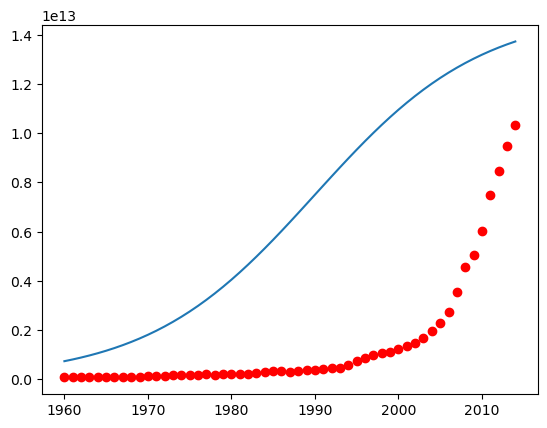

In [19]:
beta_1 = 0.10
beta_2 = 1990.0

# logistic function
Y3_pred = sigmoid(x3_data, beta_1, beta_2)

# plot initial prediction against datapoints
plt.plot(x3_data, Y3_pred * 15000000000000.0)
plt.plot(x3_data, y3_data, "ro")

**Optimalisasi parameter**

In [20]:
# Normalisasi Data
x3data = x3_data / max(x3_data)
y3data = y3_data / max(y3_data)

**Bagaimana cara menemukan parameter yang optimal?**
<p>
Kita dapat menggunakan curve_fit yang menggunakan kuadrat terkecil non-linear untuk menyesuaikan fungsi sigmoid kita, dengan data. Nilai-nilai optimal untuk parameter-parameternya sehingga jumlah kuadrat residu sigmoid(xdata, *popt) - ydata dapat diminimalkan.

popt adalah parameter-parameter yang telah dioptimalkan.
</p>

In [21]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x3data, y3data)

# print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451700, beta_2 = 0.997207


**Model Regresi setelah Optimalisasi**

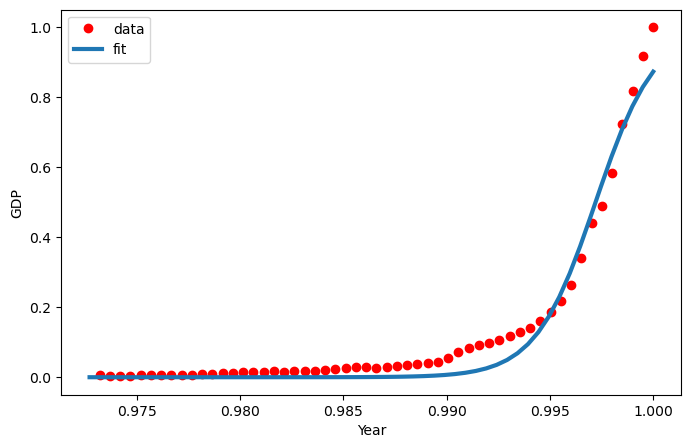

In [22]:
x3 = np.linspace(1960, 2015, 55)
x3 = x3 / max(x3)
plt.figure(figsize=(8, 5))
y3 = sigmoid(x3, *popt)
plt.plot(x3data, y3data, "ro", label="data")
plt.plot(x3, y3, linewidth=3.0, label="fit")
plt.legend(loc="best")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

In [23]:
# split data into train/test
msk = np.random.rand(len(gdp_data)) < 0.8
x3_train = x3data[msk]
x3_test = x3data[~msk]
y3_train = y3data[msk]
y3_test = y3data[~msk]

# buat model dengan train set
popt, pcov = curve_fit(sigmoid, x3_train, y3_train)

# prediksi dengan test set
y3_hat = sigmoid(x3_test, *popt)

# metrik evaluasi
print("Mean absolute error: %.2f" % np.mean(np.absolute(y3_hat - y3_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y3_hat - y3_test) ** 2))
print("R2-score: %.2f" % r2_score(y3_hat, y3_test))

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98


** **

## <b>Evaluation Metrics (Regresi)</b>
<a name="evaluation-metrics-regresi"></a>
<p align="center">
    <img src="../images/eval_metrics.png" width='750'>
</p>

src: https://www.kdnuggets.com/machine-learning-evaluation-metrics-theory-and-overview

<p>
    <ul>
        <li>
        <p><b>Mean Average Error (MAE):</b> MAE adalah metrik yang digunakan untuk mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. MAE dapat memberikan informasi tentang seberapa besar kesalahan rata-rata dari model. Semakin kecil nilai MAE, semakin baik model dalam melakukan prediksi.</p>
        </li>
        <li>
        <p><b>Mean Squared Error (MSE):</b> MSE adalah metrik yang mengukur rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. MSE memberikan bobot lebih besar pada kesalahan yang besar, sehingga model akan lebih peka terhadap nilai-nilai yang sangat jauh dari nilai sebenarnya. Namun, MSE memiliki kelemahan yaitu sulit diinterpretasikan karena hasilnya adalah dalam bentuk kuadrat.</p>
        </li>
        <li>
        <p><b>Root Mean Squared Error (RMSE):</b> RMSE adalah metrik yang mirip dengan MSE, namun RMSE memiliki satuan yang sama dengan variabel dependen. RMSE adalah akar dari MSE, sehingga hasilnya lebih mudah diinterpretasikan karena memiliki satuan yang sama dengan variabel dependen.</p>
        </li>
        <li>
        <p><b>R-Squared (R2):</b> R2 atau koefisien adalah metrik yang mengukur seberapa baik variabel independen dapat menjelaskan variasi dari variabel dependen dalam model regresi. Nilai R2 berkisar antara 0 hingga 1, di mana nilai 1 menunjukkan bahwa model dapat menjelaskan seluruh variasi data, sedangkan nilai 0 menunjukkan bahwa model tidak dapat menjelaskan variasi data sama sekali. R2 yang tinggi menunjukkan bahwa model cocok dengan data dengan baik.</p>
        </li>
    </ul>
</p>